# Class exercise 2 - Decision Tree - Spectral dataset

In this exercise we will train a decision tree based on the spectral dataset. we have 722 columns as the x dataset and the label column as the y dataset

The dataset will be split - 70% for training and 30% for test.

The following paramters will be fixed: criterion=entropy, cv=3 (cross validation), n_jobs = 4 (number of parallel jobs)

1. Examine the influnce of different parameters of the decision tree:
        a. Check the influence of the parameter "max_depth".
        b. Check the influence of the parameter "min_samples_leaf".
        c. Check the influence of the parameter "max_leaf_nodes".
2. Choose the optimal value of each paramter and run it all together.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


C:\Users\rash9\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def read_file(file_name, cols_start, cols_end):
    label_df = pd.read_csv(file_name, usecols=[722]) # read spcified number of cols
    label_data = label_df.values
    
    # specific size for this specific data
    if(cols_end > 722):
        cols_end = 722
        
    cols = list(range(cols_start,cols_end)) 
    df = pd.read_csv(file_name, usecols=cols) # read spcified number of cols
   
    data = df.values
    return data, label_data

# Class example:
### Visualitaion of a tree

[Text(0.4, 0.8333333333333334, 'X[706] <= 128.5\nentropy = 1.0\nsamples = 698\nvalue = [352, 346]\nclass = Class 0'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 333\nvalue = [333, 0]\nclass = Class 0'),
 Text(0.6, 0.5, 'X[462] <= 154.5\nentropy = 0.295\nsamples = 365\nvalue = [19, 346]\nclass = Class 1'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.092\nsamples = 339\nvalue = [4, 335]\nclass = Class 1'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.983\nsamples = 26\nvalue = [15, 11]\nclass = Class 0')]

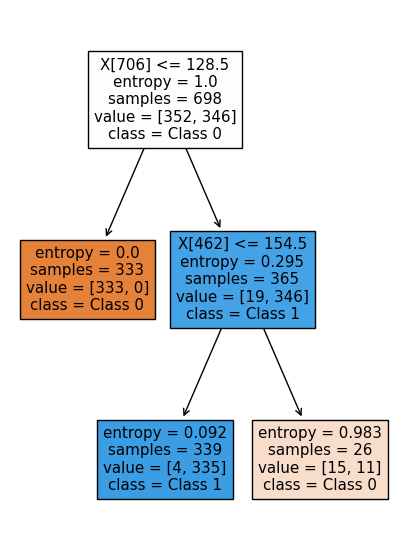

In [49]:
x,y= read_file("spectral.csv", 0, 722)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
class_tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 2)
class_tree_clf.fit(x_train, y_train)
class_names = ['Class 0', 'Class 1']
# We look at a different parameter each level, chosen by the fit() function.
# We can see that every sample that with where the value of x[706]<128.5 (root of tree) is immediatley classified
# to the left side of tree).
# Next (right side of tree), for all the rest of the samples:
# we look at the x[462]: if it's <=154.5 than it's classified as Class 1, else it's Class 0.

plt.figure(figsize=(5,7))
ax = plt.axes()
tree.plot_tree(class_tree_clf, filled=True, ax=ax, class_names=class_names)

In [5]:
def cm_and_accuracy(tree_clf, x_dataset, y_dataset):
    y_pred = tree_clf.predict(x_dataset)
    cm = confusion_matrix(y_dataset, y_pred)
    accuracy = cm.diagonal().sum()/cm.sum()
    return cm, accuracy

In [6]:
# Predict train values and calculate confusion matrix and accuracy
cm_train, accuracy_train = cm_and_accuracy(class_tree_clf, x_train, y_train)
print("Train confusion matrix:")
print(cm_train)
print()
print("Train accuracy:",accuracy_train)

Train confusion matrix:
[[348   4]
 [ 11 335]]

Train accuracy: 0.9785100286532952


In [7]:
# Predict test values and calculate confusion matrix and accuracy
cm_test, accuracy_test = cm_and_accuracy(class_tree_clf, x_test, y_test)
print("Test confusion matrix:")
print(cm_test)
print()
print("Test accuracy:",accuracy_test)

Test confusion matrix:
[[145   2]
 [  9 144]]

Test accuracy: 0.9633333333333334


# Classwork:

In [8]:
def calc_accuracy(tree, x, y, x_train, x_test, y_train, y_test):
               
        scores = cross_val_score(estimator=tree, X=x, y=y, cv=3, n_jobs=4)
        cross_acc = scores.mean()
    
        # train classifier
        tree.fit(x_train, y_train)

        # use the classifier on train data
        train_new_vals = cm_and_accuracy(tree, x_train, y_train)
        train_acc = train_new_vals[1]

        # use the classifier on test data  
        test_new_vals = cm_and_accuracy(tree, x_test, y_test)
        test_acc = test_new_vals[1]
        return cross_acc, train_acc, test_acc

In [9]:
def plot_accuracy(train_acc_vec, valid_vec_acc, test_vec_acc):
        
    tmp = len(train_acc_vec)+2

    plt.plot(range(2,tmp),train_acc_vec)
    plt.plot(range(2,tmp),valid_vec_acc)
    plt.plot(range(2,tmp),test_vec_acc)

    # find optimal value and it's index
    opt_value = max(valid_vec_acc)
    opt_value_index = valid_vec_acc.index(opt_value)+2
    
    # mark the optimal value with a red dot on the graph
    plt.plot(opt_value_index, opt_value, 'ro')
    
    plt.legend(["train", "validation", "test", "select value"])
    plt.ylabel("Accuracy")
    
    return opt_value_index

### Question 1a - tree depth:

In [10]:
# changed number of tree depth 
def dt_max_depth_check(x, y):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    cross_acc = []
    train_acc = []
    test_acc = []
    
    for i in range (2,15):
        #create classifier
        tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth = i)
        
        accuracy_results = calc_accuracy(tree_clf, x, y, x_train, x_test, y_train, y_test)
        cross_acc.append(accuracy_results[0])
        train_acc.append(accuracy_results[1])
        test_acc.append(accuracy_results[2])
    
    return train_acc, test_acc, cross_acc

Text(0.5, 1.0, "Accruacy vs tree's maximal depth")

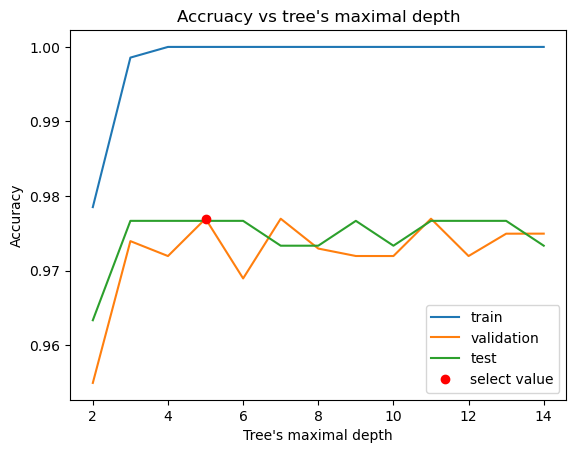

In [11]:
train_acc_vec, test_vec_acc, cross_valid_vec_acc = dt_max_depth_check(x, y)
depth_opt_value = plot_accuracy(train_acc_vec, cross_valid_vec_acc, test_vec_acc)
plt.xlabel("Tree's maximal depth")
plt.title("Accruacy vs tree's maximal depth")

### Question 1b - min sample leaf:

In [12]:
 # min samples leaf
def dt_min_sample_leaf_check(x, y):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
    cross_acc = []
    train_acc = []
    test_acc = []
    
    for i in range(2,10):
        #create classifier
        tree_clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf = i)
        
        accuracy_results = calc_accuracy(tree_clf, x, y, x_train, x_test, y_train, y_test)
        cross_acc.append(accuracy_results[0])
        train_acc.append(accuracy_results[1])
        test_acc.append(accuracy_results[2])
        
    return train_acc, test_acc, cross_acc

Text(0.5, 1.0, 'Accruacy vs minimal number of samples in a leaf')

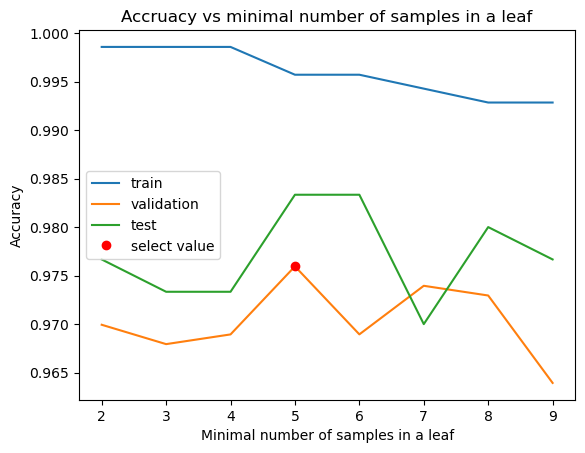

In [13]:
train_acc_vec, test_vec_acc, cross_valid_vec_acc = dt_min_sample_leaf_check(x, y)

leaf_opt_value = plot_accuracy(train_acc_vec, cross_valid_vec_acc, test_vec_acc)
plt.xlabel("Minimal number of samples in a leaf")
plt.title("Accruacy vs minimal number of samples in a leaf")

### Question 1c - max leaf node:

In [14]:
 # max leaf nodes
def dt_leaf_node_check(x, y):
    
    # split data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
    cross_acc = []
    train_acc = []
    test_acc = []
    
    for i in range(2,15):
        #create classifier
        tree_clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = i)

        accuracy_results = calc_accuracy(tree_clf, x, y, x_train, x_test, y_train, y_test)
        cross_acc.append(accuracy_results[0])
        train_acc.append(accuracy_results[1])
        test_acc.append(accuracy_results[2])
        
    return train_acc,test_acc, cross_acc

Text(0.5, 1.0, 'Accruacy vs maximal number of leaves')

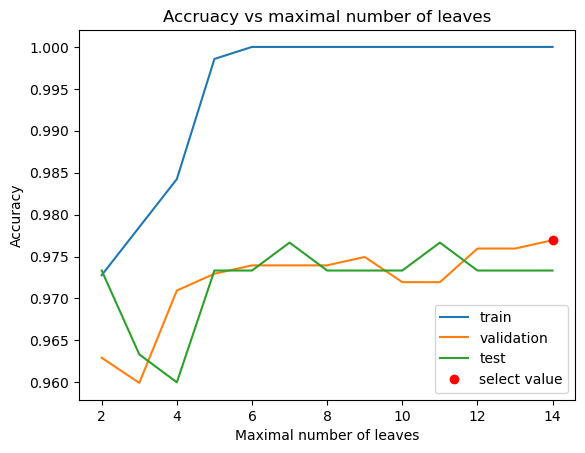

In [15]:
train_acc_vec, test_vec_acc, cross_valid_vec_acc = dt_leaf_node_check(x, y)
leaf_node_opt_value = plot_accuracy(train_acc_vec, cross_valid_vec_acc, test_vec_acc)
plt.xlabel("Maximal number of leaves")
plt.title("Accruacy vs maximal number of leaves")

### Question 2 - run it all together:

In [16]:
print("max_depth value:", depth_opt_value)
print("max_leaf_nodes value:", leaf_node_opt_value)
print("min_samples_leaf:", leaf_opt_value)

max_depth value: 5
max_leaf_nodes value: 14
min_samples_leaf: 5


In [17]:
def get_acc(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    accuracy = cm.diagonal().sum()/cm.sum()
    return accuracy

In [18]:
tree_clf = DecisionTreeClassifier(criterion='entropy',
                                  max_depth = depth_opt_value,
                                  max_leaf_nodes = leaf_node_opt_value,
                                  min_samples_leaf = leaf_opt_value)

# train classifier
tree_clf.fit(x_train, y_train)

# use the classifier on train data
y_pred_train = tree_clf.predict(x_train)
train_acc = get_acc(y_train, y_pred_train)

print ("train accuracy =", train_acc)

# use the classifier on test data
y_pred_test = tree_clf.predict(x_test)
test_acc = get_acc(y_test, y_pred_test)
print ("test accuracy =", test_acc)

train accuracy = 0.995702005730659
test accuracy = 0.9833333333333333
